# 🧑‍🏫 Specifying IMU preprocessing parameters

## Overview of preprocessing chain

## Specifying filter-bank parameters

In [1]:
from rockpool.devices.xylo.imu.imuif import FilterBank, BandPassFilter

In [27]:
low_cut = 5. # Hz
high_cut = 10. # Hz
Fs = 200. # Hz
bpf = BandPassFilter.from_specification(low_cut, high_cut, Fs)
print(bpf)

BandPassFilter(B_b=3, B_wf=8, B_af=12, a1=-59258, a2=27986, scale_out=0.5836772581461332)


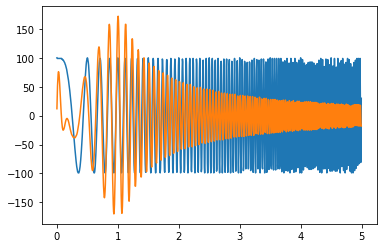

In [28]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

T = 1000
times = np.arange(0, T) / Fs
chirp = np.array(sig.chirp(times, 0, T/Fs, 40) * 100, dtype=np.int64).astype(object)

plt.plot(times, chirp)
plt.plot(times, bpf(chirp))

In [42]:
fb = FilterBank.from_specification((1, 3), (0.1, 1, 200), (1, 10, 200), (40, 50, 200))

In [43]:
out, _, _ = fb(chirp)

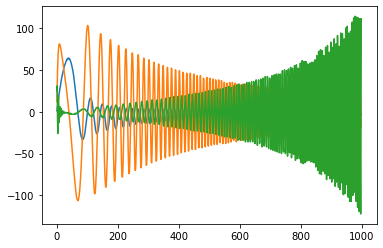

In [44]:
plt.plot(out[0])